In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn


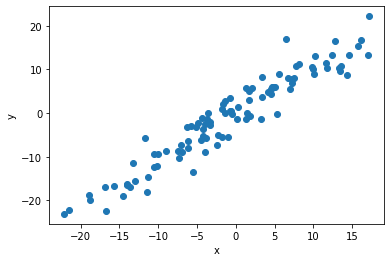

In [2]:
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x');


In [3]:
class LR(nn.Module):
  def __init__(self, i, o):
    super().__init__()
    self.linear = nn.Linear(i, o)

  def forward(self, x):
    pred = self.linear(x)
    return pred  

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [6]:
def plot_graph(title):
  plt.title(title)
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

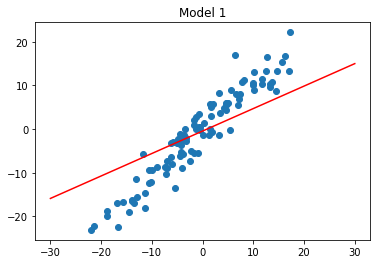

In [7]:
plot_graph("Model 1")

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs = 100
losses = []
for epoch in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("Epoch: ", epoch, "Loss: ", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Note here that we need to use zero_grad as the gradients of the loss fn tend to accumulate
  #Optimizer used here is always to step in opp dirn of gradient rise, after calc of the gradient

Epoch:  0 Loss:  34.4139404296875
Epoch:  1 Loss:  23.985158920288086
Epoch:  2 Loss:  17.837261199951172
Epoch:  3 Loss:  14.212259292602539
Epoch:  4 Loss:  12.074118614196777
Epoch:  5 Loss:  10.812294006347656
Epoch:  6 Loss:  10.066957473754883
Epoch:  7 Loss:  9.62607192993164
Epoch:  8 Loss:  9.364663124084473
Epoch:  9 Loss:  9.209088325500488
Epoch:  10 Loss:  9.115943908691406
Epoch:  11 Loss:  9.059645652770996
Epoch:  12 Loss:  9.025117874145508
Epoch:  13 Loss:  9.003475189208984
Epoch:  14 Loss:  8.989473342895508
Epoch:  15 Loss:  8.980024337768555
Epoch:  16 Loss:  8.973308563232422
Epoch:  17 Loss:  8.968243598937988
Epoch:  18 Loss:  8.96419906616211
Epoch:  19 Loss:  8.960794448852539
Epoch:  20 Loss:  8.957810401916504
Epoch:  21 Loss:  8.955109596252441
Epoch:  22 Loss:  8.952613830566406
Epoch:  23 Loss:  8.950274467468262
Epoch:  24 Loss:  8.9480619430542
Epoch:  25 Loss:  8.945956230163574
Epoch:  26 Loss:  8.94394588470459
Epoch:  27 Loss:  8.942021369934082
Ep

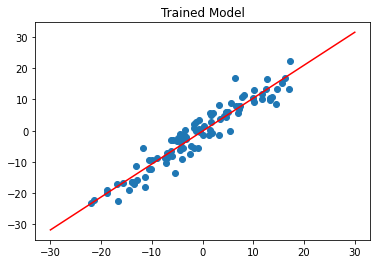

In [10]:
#Plotting the fit
plot_graph("Trained Model")

Text(0, 0.5, 'Loss')

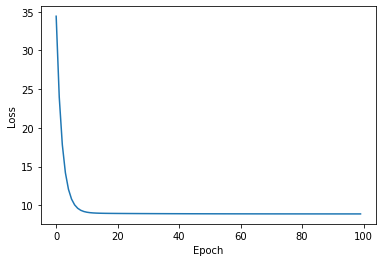

In [11]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')